# Scikit Learn <a href="https://scikit-learn.org/stable/#"><img id='logo' height=36 src="https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png"></a>
<style>
#logo {
    background-color: white;
    border-radius: 10px;
    }
</style>

scikit-learn (или sklearn) это библиотека на языке программирования Python, которая используется для решения задач машинного обучения, в том числе классификации, регрессии, кластеризации и обработки данных. Она предоставляет реализацию многих алгоритмов машинного обучения, таких как метод опорных векторов (SVM), случайный лес (Random Forest), метод главных компонент (PCA) и многие другие.

Библиотека scikit-learn позволяет быстро создавать и применять модели машинного обучения на больших наборах данных. Она также включает в себя множество функций для предобработки данных, оценки качества моделей и выбора оптимальных параметров моделей.

## Загрузка и визуализация данных 

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ice_cream_data = pd.read_csv('ice_cream_selling_train_data.csv')
ice_cream_data.head()

,temperature,ice_cream_sales
0,11.9,125
1,12.1,158
2,12.7,156
3,12.9,162
4,13.2,152


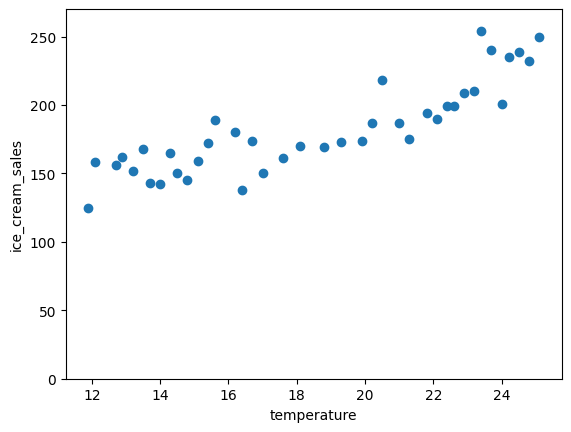

In [114]:
X = ice_cream_data['temperature']
y = ice_cream_data['ice_cream_sales']
plt.scatter(X, y)
plt.ylim(0, 270)
plt.xlabel('temperature')
plt.ylabel('ice_cream_sales')
plt.show()

In [115]:
# посмотрим на форму загруженных данных:
ice_cream_data.shape

(40, 2)

## Постановка задачи линейной регрессии

### Задача регрессии
Загруженные данные содержат 40 строк и 2 столбца. Соответственно, в нашем распоряжении 40 образцов с двумя признаками: `temperature` и `ice_cream_sales`. Значения признака `ice_cream_sales` некоторым образом зависит от значений `temperature`. Задача заключается в том, чтобы найти эту закономерность: построить некоторую функцию, которая выражала бы эту зависимость. Это и есть задача регрессии: в общем случае у нас есть целевой числовой признак, который каким-то образом зависит от других признаков, и нужно выяснить, какая функция выражает эту зависимость. В нашем случае у нас есть лишь один нецелевой признак `temperature`, от которого зависит целевой признак `ice_cream_sales`, но чаще целевой признак зависит от многих (нецелевых) признаков.

### Линейная зависимость
Мы говорим, что целевой признак $y$ зависит **пропорционально** от другого нецелевого признака $x$, если с увеличением значений нецелевого признаков в $k$ раз, целевой признак также увеличивается в $k$ раз, в соответствии с формулой $y=bx$. Линейная зависимость выражается формулой $y=a + bx$, т.е. добавляется еще некоторое смещение $a$. В этом случае, если увеличить $x$ на величину $\Delta x$, то $y$ увеличится на величину, пропорциональную $\Delta x$:
$$
\Delta y = b \Delta x
$$
Посмотрим на график. При исходном значении температуры около 14 градусов значения продаж мороженного лежат около 150. Если увеличить температуру на четыре единицы ($\Delta x = 4$), то при 18 градусах значения продаж мороженного будут лежать около 175, а значит $\Delta y = 175 - 150 = 25$. Если увеличить температуру на восемь единиц ($\Delta x = 8$), то при температуре 22 градуса значения целевого признака будутлежать около 200, при этом $\Delta y = 50$. Обратим внимание на то, что если выбрать $\Delta x$ вдвое больше, то и $\Delta y$ будет вдвое больше. Это говорит о том, что в наших данных прослеживается линейная зависимость целевого признака `ice_cream_sales` от нецелевого признака `temperature`.

Если по каждому значению $x$ из множества значений признака `temperature` получить значения $y$ по формуле $y = a + bx$, и изобразить эти точки на плоскости, то все точки будут лежать на некоторой прямой (ниже вы сможете в этом убедиться в секции, где нужно будет заменить функцию `plot()` на функцию `scatter()`). Параметры $a$ и $b$ определяют расположение и ориентацию прямой на плоскости. Прямая, которая описывает зависимость в наших данных, должна располагаться на плоскости так, чтобы все точки оказались как можно ближе к ней. 

Если целевой признак $y$ зависит от нескольких других признаков $x_1, x_2, \ldots ,x_n$. То формула линейной зависимости будет выглядеть так:
$$
y = a + b_1 x_1 + b_2 x_2 + \dots + b_n x_n
$$

### Линейная регрессия
Целевой признак может зависеть от других признаков довольно сложным образом. Наиболее простым случаем является линейная зависимость. Поэтому, можно начинать с предположения, что целевой признак зависит от других признаков линейным образом, и попробовать решить задачу. И даже если зависимость не является строго линейной, то вполне может быть, что линейное приближение дает приемлемый результат. Оценив результат решения задачи, можно сделать вывод, годится ли такое решение. Если зависимость существенно отличается от линейной, то следует искать нелинейные зависимости.

## Разбиение данных на обучающую и тестовую выборки

Первым делом, нам следует разбить весь набор данных на тренировочную (обучающую) и тестовую выборки. Это необходимо для того, чтобы мы могли проконтролировать правильность работы модели. Ведь может получиться так, что модель хорошо прогнозирует на тех данных, на которых мы ее обучили, и плохо прогнозирует на данных, которые она еще "не видела". Поэтому мы целенаправленно отбираем из исходных данных некоторый тестовый набор, который не будет участвовать в обучении. И на этом наборе мы будем проверять, умеет ли модель хорошо прогнозировать целевое значение. Такую проверку еще называют валидацией.

Можно самостоятельно написать функцию, которая будет разделять исходные данные на две выборки, но мы воспользуемся функцией `train_test_split()`, которая предоставляется библиотекой `sklearn` в модуле `model_selection`. Первым аргументом в эту функцию передается набор данных, который может быть представлен как объект `DataFrame` или как массив NumPy. Доля данных, которая будет отведена на тестовую выборку указывается в аргументе `test_size`. Обычно достаточно отобрать пятую часть (`0.2`) от всей выборки. Функция `train_test_split()` возвращает кортеж из двух элементов: первый элемент - тренировочная выборка, второй элемент - тестовая выборка. Присвоим эти значения переменным `train_data` и `test_data` соответственно.

In [116]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(ice_cream_data, 
                                         test_size=0.2,
                                         random_state=42)

In [117]:
# заметим, что отбираются случайные образцы, и производится их перетосовка:
test_data

,temperature,ice_cream_sales
19,18.1,170
16,16.7,174
15,16.4,138
26,21.3,175
4,13.2,152
12,15.4,172
37,24.5,239
27,21.8,194


Теперь, когда данные разбиты на тренировочную и тестовую выборки, преобразуем их в массивы NumPy при помощи метода `to_numpy()`. В `X_train` присвоится массив, содержащий значения признака `temperature`, а в `y_train` - значения целевого признака `ice_cream_sales`, из тренировочного набора. Аналогичным образом, переменным `X_test` и `y_test` присваиваются данные из тестового набора:

In [118]:
X_train = train_data['temperature'].to_numpy()
y_train = train_data['ice_cream_sales'].to_numpy()

X_test = test_data['temperature'].to_numpy()
y_test = test_data['ice_cream_sales'].to_numpy()

# посмотрим на формы массивов:
print(f"{ice_cream_data.shape = }")
print(f"{X_train.shape = }, {y_train.shape = }")
print(f"{X_test.shape = }, {y_test.shape = }")

ice_cream_data.shape = (40, 2)
X_train.shape = (32,), y_train.shape = (32,)
X_test.shape = (8,), y_test.shape = (8,)


Обычно признаков много, и `X_train` представляет собой двумерную матрицу, строки которой соответствуют образцам выборки, а столбцы - признакам. Поэтому стандартным представлением выборки является двумерный массив. В нашем случае, так как нецелевой признак у нас единственный, то для `X_train` и `X_test` метод `to_numpy()` вернул одномерные массивы, с формами `(32,)` и `(8,)` соответственно. Поэтому необходимо преобразовать их в привычную форму при помощи метода `reshape()`. Подробнее о том, как работает этот метод смотрите в файле numpy_example.ipynb.

In [119]:
X_train = X_train.reshape((32, 1))
X_test = X_test.reshape((8, 1))

print(f"{X_train.shape = }")
print(f"{X_test.shape = }")

X_train.shape = (32, 1)
X_test.shape = (8, 1)


Теперь массивы `X_train` и `X_test` являются двумерными массивами, содержащими по одному столбцу. Если признаков будет больше, то такой трансформации формы производить не придется.

## Выбор модели и обучение 

Модель машинного обучения, которую мы будем использовать для решения задачи линейной регрессии реализована в классе `LinearRegression` модуля `linear_model` библиотеки `sklearn`. Данная модель способна решать задачу линейной регрессии. О том, что такое модель, и как именно она это делает, будет написано ниже. А сейчас просто воспользуемся этой моделью дла решения задачи. Первым делом создается объект модели, как экзепляр класса `LinearRegression`. Теперь необходимо обучить модель. Обучение модели производится при помощи метода `fit()`. Первым аргументом модель получает двумерный массив, строки которого соответсвуют образцам тренировочной выборки, а столбцы соответсвтуют признакам, т.е. матрицу с тернировочными данными, содержащими нецелевые признаки. Вторым аргументом передается массив, содержащий значения целевого признака.

In [120]:
from sklearn.linear_model import LinearRegression

# создается объект модели:
model = LinearRegression()       
# обучение модели на тренировочных данных:
model.fit(X_train, y_train)      

LinearRegression()

## Прогнозирование
Теперь, когда модель обучена, она способна прогнозировать целевое значение по заданному нецелевому признаку. Это делается при помощи метода `predict()`, в которой передается один аргумент, содержащий данные с нецелевыми признаками, например, `X_test`. Метод вернет массив содержащий спрогнозированные целевые значения. Присвоим этот массив переменной `y_test_predicted`. Напечатаем в виде таблицы значения, содержащиеся в переменных `X_test`, `y_test` и `y_test_predicted`, чтобы сравнить фактические значения целевого признака и спрогнозированные значения.

In [121]:
y_test_predicted = model.predict(X_test)

# напечатаем результат в виде таблицы
header = f"X_test\ty_test\ty_test_predicted"
print(header, '\n', '-'*len(header), sep='')
for j in range(10):
    i = np.random.randint(0, len(y_test))
    print(f"{X_test[i]}\t{y_test[i]}\t{int(y_test_predicted[i])}")

X_test	y_test	y_test_predicted
------------------------------
[15.4]	172	162
[16.7]	174	171
[13.2]	152	147
[16.4]	138	169
[16.4]	138	169
[16.4]	138	169
[18.1]	170	180
[16.7]	174	171
[16.7]	174	171
[16.4]	138	169


Произведем прогнозирование также и на тренировочных данных `X_train` и результат присвоим переменной `y_train_predicted`. Нарисуем распределения точек выборки функцией `scatter()`, а для отрисовки точек, соответствующих спрогнозированным значениям, используем функцию `plot()` чтобы получить линию, соединяющую эти точки. Данные тренировочной выборки изображены серыми точками, а данные тестовой выборки - зелеными. 

Text(0, 0.5, 'ice_cream_sales')

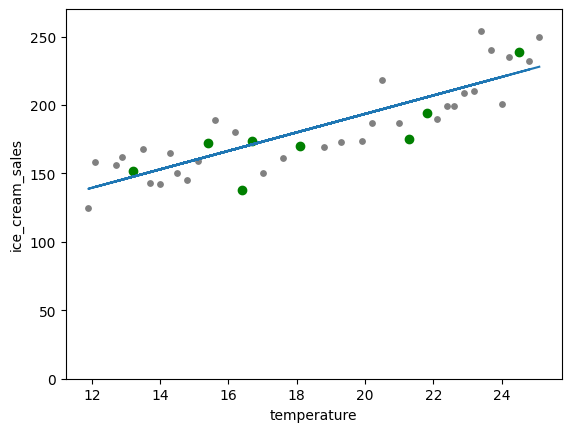

In [122]:
# произведем прогнозирование на тренировочных данных
y_train_predicted = model.predict(X_train.reshape(-1, 1))

plt.scatter(X_train, y_train, c='grey', s=15)
plt.scatter(X_test, y_test, c='green')
plt.plot(X_train, y_train_predicted)
plt.ylim(0, 270)

plt.xlabel('temperature')
plt.ylabel('ice_cream_sales')

Линия, соединяющая спрогнозированные значения получилась прямой, как и ожидалось от линейной регрессии. Эта прямая действительно довольно близко расположилась к точкам. Попробуйте использовать функцию `scatter()` вместо `plot()` и непосредственно посмотреть на прогнозные точки.

## Оценка результата

Для того, чтобы оценить корректность регрессионной модели, можно подсчитать среднеквадратическое отклонение предсказанных значений `y_test_predicted` от фактических значений `y_test`, используя функцию `mean_squared_error()` из модуля `metrics` библиотеки `sklearn`.

In [123]:
from sklearn.metrics import mean_squared_error as mse

train_rmse = mse(y_train, y_train_predicted, squared=False)
test_rmse = mse(y_test, y_test_predicted, squared=False)

print(f'{train_rmse = }, {test_rmse = }')

train_rmse = 16.270633397041482, test_rmse = 16.991091479933957


**Среднеквадратическая ошибка**
$$
\mathrm{MSE} =  \frac{1}{n} \left[(y_1 - \hat{y_1})^2 + \dots + (y_n - \hat{y_n} )^2 \right]
$$
В литературе часто встречается такая сокращенная запись:
$$
\mathrm{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y_i} )^2
$$
где $y_i$ - значения из тестовой выборки, $\hat y_i$ - значения, спрогнозированные моделью (для $i$-го образца.

**Среднеквадратическое отклонение** выражается как корень от среднеквадратической ошибки:
$$
\mathrm{RMSE} = \sqrt{\mathrm{MSE}}
$$
Функция `mean_squared_error()` вычисляет среднеквадратическую ошибку (MSE) для двух массивов. Если задать параметр `squared=False`, то функция вычислит среднеквадратическое отклонение (RMSE). Для наглядности, вычислим среднеквадратическую ошибку средствами NumPy, чтобы лучше представить себе, что именно происходит внутри функции `mean_squared_error()`:

In [124]:
test_mse = np.mean((y_test - y_test_predicted) ** 2)
test_rmse = np.sqrt(test_mse)
print(test_rmse)

16.991091479933957


## Применение модели
В обучающем наборе данных нам для каждой температуры известно было значение продаж. Теперь, когда модель обучена, ее можно использовать для прогнозирования ожидаемого количества продаж мороженного при известной дневной уличной температуре. Значений продаж при этих температурах нам не известно. Модель теперь позволит нам спрогнозировать эти значения.

Загрузим данные, содержащие значения температур:

In [125]:
temperatures_data = pd.read_csv('ice_cream_sales_temperatures.csv')
temperatures_data.head()

,temperatures
0,12.32
1,11.88
2,11.85
3,13.41
4,14.09


Преобразуем данные, в массив NumPy и спрогнозируем для каждого значения температуры ожидаемое значение продаж мороженного:

In [126]:
X = temperatures_data.to_numpy()
y = model.predict(X)
y[:5]       # посмотрим прогнозы для первых 5 значений температур

array([141.58769985, 138.61590777, 138.41328558, 148.94963932,
       153.5424089 ])

Сохраним спрогнозированные значения в файл:

In [127]:
np.savetxt('ice_cream_sales_predict.csv', y, 
           header='ice_cream_sales', 
           delimiter=',', 
           fmt='%.2f', 
           comments='')

## Что под капотом?
### Понятие модели на примере класса `LinearRegression`
Моделью в нашем случае называется некоторый объект, который способен получить на "вход" нецелевые признаки образца выборки и дать на "выходе" целевое значение, которое мы хотим прогнозировать. В рассмотренном выше примере модель представляет собой объект класса `LinearRegression`. На вход она получает единственный признак образца (температуру), на выходе возвращает целевое значение (сколько мороженного ожидается продать при такой температуре). Отвечает за это метод `predict()` ("*predict*" означает "прогнозировать"). Модель класса `LinearRegression` способна решить задачу линейной регрессии, как можно понять из названия. Для этого необходимо произвести обучение на тренировочных данных. За это отвечает метод `fit()`. Первым аргументом метод получает данные нецелевых признаков образцов выборки, а вторым аргументом получает "правильные" ответы (известные значения целевого признака). Часто при этом говорят, что данные "скармливаются" модели.

Модель в машинном обучении всегда содержит внутри себя параметры, которые подгоняются к оптимальным значениям в процессе обучения ("*fit*" означает "подогнать"). В результате обучения модели класса `LinearRegression` на одномерных данных, модель создает прямую $f(x) = a + bx$, которая выражает зависимость целевого признака (*target feature*) от единственного (нецелевого) признака. В нашем случае эта прямая должна отражать зависимость продаж мороженного (ice_cream_sales) от уличной температуры (temperature). Параметрами модели являются коэффициенты $a$ и $b$, которые однозначно задают прямую на плоскости признаков.

### Метрика
В случае задачи одномерной линейной регрессии "подогнать параметры к оптимальным значениям" означает найти такие $a$ и $b$, при которых прямая $f(x) = a + bx$ лучше всего выражает зависимость продаж мороженного от температуры. Но как мы будем определять, какая прямая "лучше"? Рассмотрим пару вариантов. Значение температуры произвольной $i$-строки в данных обозначим $x_i$, а соответствующее ему значение продаж мороженного обозначим $y_i$. Когда модель будет прогнозировать значение продаж мороженного по заданному значению температуры $x_i$, результатом будет $\hat y_i = a + bx_i$. Присмотримся к разности $y_i - \hat y_i$ (которую в литературе называют невязкой). Если точка оказывается выше прямой, то это значит, что $y_i > \hat y_i$ и разность будет положительной. Если точка ниже прямой, то разность отрицательная, а если точка лежит на прямой, то разность равна нулю. Что если мы возьмем среднее разностей по всем образцам наших данных и будем считать, что лучшая прямая та, у которой минимальна средняя разность?
$$
\frac{1}{n}\left[(y_1 - \hat y_1) + \dots + (y_n - \hat y_n) \right]
$$
Рассмотрим три прямые и соответствующие им средние разности

mean differences
green: -3.000000
orange: -2.800000
red: -2302.0


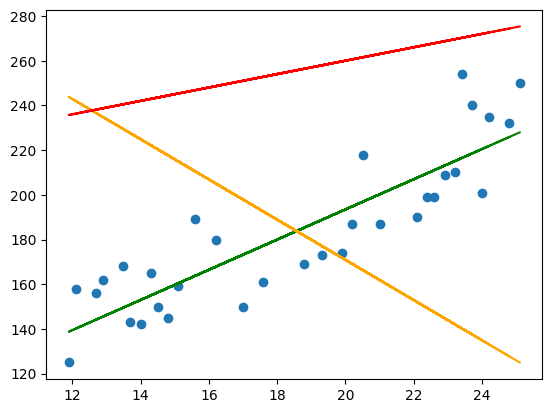

In [146]:
def mean_differences(y1, y2):
    return np.sum(y1 - y2) / len(y1)

def f(x, a, b):
    return a + b*x

y_cross = f(X_train, 350.9, -9)
y_over = f(X_train, 200, 3)

print("mean differences")
print(f"green: {mean_differences(y_train, y_train_predicted+3) :3f}")
print(f"orange: {mean_differences(y_train, y_cross) :3f}")
print(f"red: {mean_differences(y_train, y_over)}")

plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_predicted+0.01, color='green')
plt.plot(X_train, y_cross, color='orange')
plt.plot(X_train, y_over, color='red')
# plt.ylim(0, 260)

Очевидно, что выбор прямой с минимальной средней разностью будет не лучшим решением, ведь в нашем случае это красная прямая. Это произошло от того, что все точки находятся под красной кривой и их разности отрицательные. Так, суммируя разности мы получили отрицательное число с большим абсолютным значением.

Заметим, что средняя разность оранжевой прямой, хотя она совсем не выражает зависимость в данных, довольно близка к нулю, как и средняя разность зеленой прямой. Посмотрим, какие значения принимают разности для оранжевой прямой.

In [129]:
lenght = y_cross.shape[0]
print((y_train - y_cross.reshape(lenght))[:7])      # первые 7 образцов

[124.4 -85.2  24.5 -71.  -22.1  63.6 101.8]


Часть точек оказалось под оранжевой прямой и их разности отрицательны, а другая часть оказалась над прямой, их разности положительны. И несмотря на то, что, абсолютные значения этих разностей весьма велики, при суммировании, они компенсируют друг друга и итоговое значение средней разности оказывается близким к нулю. 

Если бы мы суммировали не сами разности, а их абсолютные значения, то такой компенсации не получилось бы, и оранжевая прямая дала бы большое значение разности. Обозначим среднее от модулей разностей буквой $E_1$
$$
E_1 = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat y_i| = \frac{1}{n}\left(|y_1 - \hat y_1| + \dots + |y_n - \hat y_n| \right)
$$

mean abs differences
green: 14.618675
orange: 1345.512500
red: 2319.475


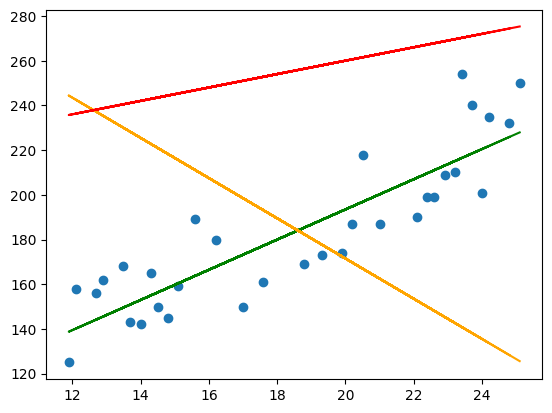

In [130]:
def mean_abs_differences(y1, y2):
    return np.sum(np.abs(y1 - y2)) / len(y1)

print("mean abs differences")
print(f"green: {mean_abs_differences(y_train, y_train_predicted+.01) :3f}")
print(f"orange: {mean_abs_differences(y_train, y_cross) :3f}")
print(f"red: {mean_abs_differences(y_train, y_over)}")

plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_predicted+0.01, color='green')
plt.plot(X_train, y_cross, color='orange')
plt.plot(X_train, y_over, color='red')
# plt.ylim(0, 260)

Минимальное значение функции $E_1$ достигается для зеленой прямой. В идеальном случае все точки лежали бы на прямой, и функция $E_1$ приняла бы значение 0. Это минимальное допустимое значение, так как сумма неотрицательных чисел не может быть меньше нуля. Чем больше точек отклоняются от прогнозируемых значений и чем сильнее они отклоняются, тем больше будет $E_1$. Поэтому можно сказать, что функция $E_1$ характеризует ошибочность модели на данных. Чем меньше будет $E_1$, тем меньше ее ошибочность, и, соответственно, лучше результаты. Такие функции называются **метриками**, а в частности рассмотренная функция $E_1$ называется метрикой L1 (или метрикой городских кварталов). В следующем разделе мы рассмотрим другую метрику.

### Метод наименьших квадратов
Метод наименьших квадратов представляет собой алгоритм машинного обучения, который позволяет решать задачу линейной регрессии. В этом методе параметры модели подгоняются так, чтобы среднее значение квадратов разностей $y_i - \hat y_i$ оказалось минимальным.
$$
E_2 = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat y_i)^2 = \frac{1}{n}\left[(y_1 - \hat y_1)^2 + \dots + (y_n - \hat y_n)^2 \right]
$$
Метрика $E_2$ называется L2 метрикой (или метрикой Евклида). 

В случае одномерной регрессии минимальное значение функции $E_2$ достигается при следующих значениях параметров $a$ и $b$:
$$\hat a = \overline y - \hat b \overline x$$
$$\hat b = \frac{ \sum_{i=1}^n (x_i - \overline x)(y_i - \overline y)}{\sum_{i=1}^n (x_i - \overline x)^2}
$$
где $ \overline x$ и  $\overline y$ - это средние значения.

Именно таким образом вычисляются оптимальные параметры модели класса `LinearRegression` при вызове метода `fit()`. Получить коэффициенты $a$ и $b$ из модели можно через свойства `intercept_` и `coef_` соответственно:

In [131]:
a = model.intercept_
b = model.coef_
print(f'{a = }, {b = }')

a = 58.37752157736209, b = array([6.75407291])


При вызове метода `predict()` модель вычисляет прогнозируемое значение для каждого $i$-го образца из `X_test` по формуле $\hat y_i = a + bx_i$. Убедимся в этом самостоятельно вычислив значения $\hat y_i$ воспользовавшись полученными из модели параметрами `a` и `b`:

Text(0, 0.5, 'ice_cream_sales')

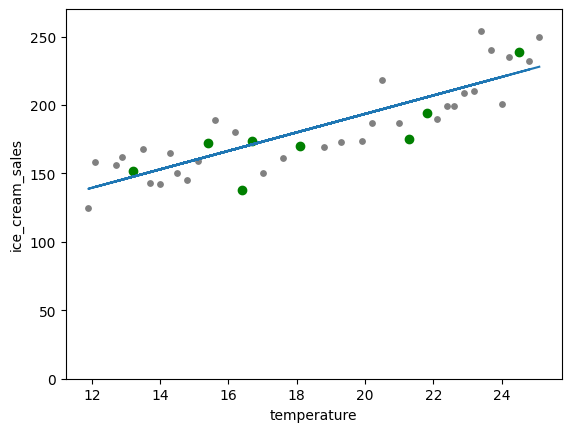

In [132]:
y = a + b * X_train
# y = model.predict(X_train.reshape(-1, 1))

plt.scatter(X_train, y_train, c='grey', s=15)
plt.scatter(X_test, y_test, c='green')
plt.plot(X_train, y)
# plt.plot(X_train, y_train_predicted)
plt.ylim(0, 270)
plt.xlabel('temperature')
plt.ylabel('ice_cream_sales')

## Если признаков много
В рассмотренном примере всего один нецелевой признак, поэтому решалась задача одномерной регрессии. Как упоминалось выше, признаков $x_1, x_2, \ldots, x_n$, от которых зависит целевой признак $y$ может быть несколько. Тогда мы имеем дело с многомерной регрессией. Если модели класса `LinearRegression` "скормить" данные, содержащие $n$ признаков, то она создаст внутри себя параметры $a, b_1, b_2, \ldots, b_n$ и подгонит их так, чтобы формула 
$$
y = a + b_1 x_1 + b_2 x_2 + \dots + b_n x_n
$$
выражала зависимость целевого признака $y$ от других признаков $x_1, x_2, \ldots, x_n$.